### <b style="color: #5b7daf">02.Text Classification</b>

> #### <b style="color: #f86461">Dataset</b>

In [1]:
import pandas as pd
from datasets import list_datasets, load_dataset

In [3]:
emotions = load_dataset('emotion')
print(f'type: {type(emotions)}, len: {len(emotions)}')

type: <class 'datasets.dataset_dict.DatasetDict'>, len: 3


In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
for key in emotions.keys():
    print(f'key: {key}, type: {type(emotions[key])}')
    dataset = emotions[key]
    # create dataframe with 5 samples and print them
    df = pd.DataFrame(dataset[:5])
    print(df)
    

key: train, type: <class 'datasets.arrow_dataset.Dataset'>
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
key: validation, type: <class 'datasets.arrow_dataset.Dataset'>
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1
key: test, type: <class 'datasets.arrow_dataset.Dataset'>
                                                text  label
0  im feeling rather rotten so im not v

In [6]:
train_ds = emotions['train']
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

> #### <b style="color: #f86461">custom dataset</b>

In [33]:
dataset_url = 'https://www.dropbox.com/s/1pzkadrvffbqw60/train.txt'
!wget {dataset_url}

--2024-02-15 13:32:11--  https://www.dropbox.com/s/1pzkadrvffbqw60/train.txt
www.dropbox.com (www.dropbox.com) 해석 중... 162.125.80.18
다음으로 연결 중: www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 지정하지 않음 [text/html]
저장 위치: `train.txt'

train.txt               [ <=>                ]  65.03K  --.-KB/s    /  0.08s   

2024-02-15 13:32:11 (783 KB/s) - `train.txt' 저장함 [66590]



In [35]:
# 책에 나온 데이터 삭제 되었음
# convert train set of emotions to csv
df_train = pd.DataFrame(train_ds)
df_train.to_csv('train.csv', index=False)

In [36]:
!head -n 1 train.csv

text,label


In [44]:
emotions_local = load_dataset(
    'csv', data_files='train.csv', sep=',', names=['text', 'label'],
    skiprows=1
)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [46]:
ds_local = emotions_local['train']
ds_local[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

> #### <b style="color: #f86461">to data frame</b>

In [48]:
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [49]:
def label_int2str(label):
    return emotions['train'].features['label'].int2str(label)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


> #### <b style="color: #f86461">클래스 분포</b>
> - 소수 클래스 오버 샘플링
> - 다수 클래스 언더 샘플링
> - 더 찾아

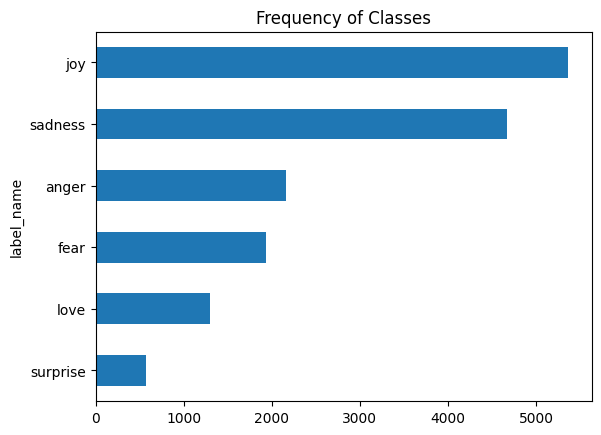

In [51]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot(kind='barh')
plt.title('Frequency of Classes')
plt.show()

> #### <b style="color: #f86461">길이확인</b>
> - 최대문맥크기


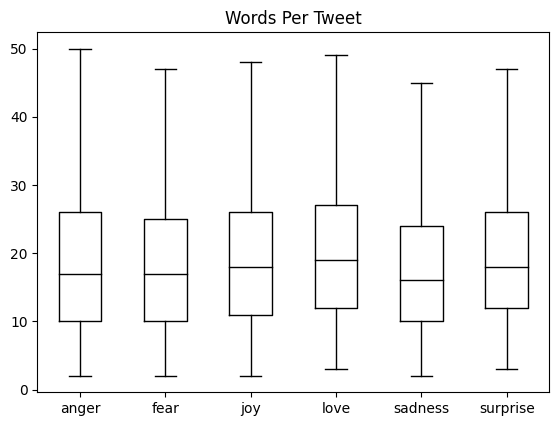

In [52]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot(
    'Words Per Tweet', by='label_name', grid=False, 
    showfliers=False, color='black'
)
plt.suptitle('')
plt.xlabel('')
plt.show()

In [53]:
emotions.reset_format()

In [7]:
# TEXT TO TOKENS
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [8]:
# 수치화
token2idx = {t:i for i, t in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [9]:
input_ids = [token2idx[t] for t in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [10]:
df_categorical = pd.DataFrame({
    'Name': ['Bumblebee', 'Optimus Prime', 'Megatron'],
    'Label ID': [0, 1, 2]
})
df_categorical

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [11]:
pd.get_dummies(df_categorical, columns=['Name']).astype(int)

,Label ID,Name_Bumblebee,Name_Megatron,Name_Optimus Prime
0,0,1,0,0
1,1,0,0,1
2,2,0,1,0


In [12]:
# ONE-HOT ENCODING
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [13]:
print(f'token: {tokenized_text[0]}')
print(f'index: {input_ids[0]}')
print(f'one-hot encoding: {one_hot_encodings[0]}')

token: T
index: 5
one-hot encoding: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [14]:
# 단어토큰화
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [15]:
# 부분단어토큰화(문자토큰화 + 단어토큰화)
from transformers import AutoTokenizer
from transformers import DistilBertTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

encoded_text = tokenizer(text)
for key in encoded_text.keys():
    print(f'{key}: {encoded_text[key]}')

input_ids: [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102]
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)
print(tokenizer.model_input_names)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
[CLS] tokenizing text is a core task of nlp. [SEP]
30522
512
['input_ids', 'attention_mask']


In [17]:
# 전체 데이터셋 토큰화
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

tokenize_sample = tokenize(emotions['train'][:2])
for key in tokenize_sample.keys():
    print(f'{key}')
    for sample in tokenize_sample[key]:
        print(sample)

input_ids
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]
attention_mask
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded['train'].column_names)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


> #### <b style="color: #f86461">전이학습(특성 추출기로 사용)</b>

In [19]:
from transformers import AutoModel
from tools.cmm import get_device

model_ckpt = 'distilbert-base-uncased'
device = get_device()
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [20]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
print(f'input tensor: {inputs["input_ids"].size()}')

inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs.keys())
print(outputs['last_hidden_state'].size())

input tensor: torch.Size([1, 6])
odict_keys(['last_hidden_state'])
torch.Size([1, 6, 768])


In [21]:
# CLS 토큰의 hidden_state
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [22]:
def extract_hidden_states(batch):
    inputs = {
        k:v.to(device) for k, v in batch.items() 
        if k in tokenizer.model_input_names
    }
    
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

# 모델에 텐서가 입력되어야 하므로 포맷 변경
emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden['train'].column_names

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [23]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [24]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [26]:
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

# 2d 임베딩
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,X,Y,label
0,4.589299,6.445045,0
1,-2.568588,6.142019,0
2,5.391321,3.178246,3
3,-2.170129,3.888501,2
4,-3.133899,4.046309,3


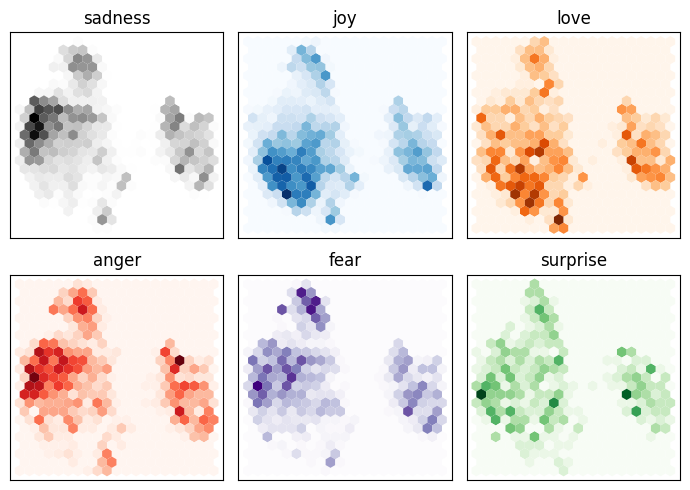

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [33]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

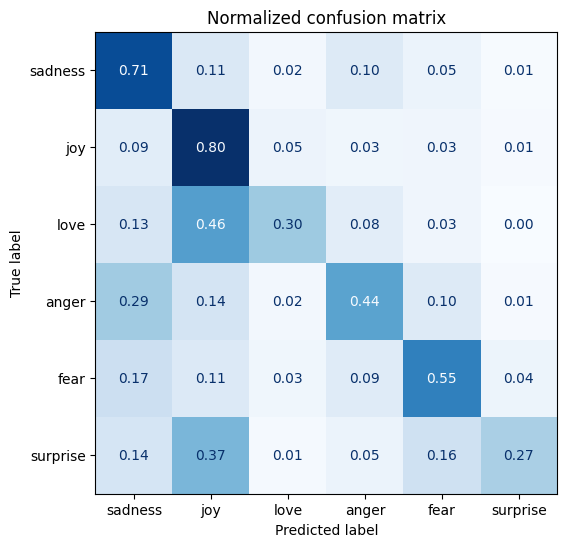

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized confusion matrix')
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [35]:
cm = confusion_matrix(y_valid, y_preds)
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1 = 2 * (precision * recall) / (precision + recall)
df_metrics = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1}, index=labels)
df_metrics

,Precision,Recall,F1
sadness,0.648425,0.710909,0.678231
joy,0.706399,0.799716,0.750167
love,0.486239,0.297753,0.369338
anger,0.512712,0.440000,0.473581
fear,0.546729,0.551887,0.549296
surprise,0.536585,0.271605,0.360656


In [42]:
print(cm)
print(cm[0][0]/cm[:, 0].sum())
print(cm[0][0]/cm[0].sum())

[[391  62  11  56  27   3]
 [ 61 563  32  20  23   5]
 [ 23  81  53  15   6   0]
 [ 80  38   6 121  28   2]
 [ 37  23   6  20 117   9]
 [ 11  30   1   4  13  22]]
0.648424543946932
0.7109090909090909


> #### <b style="color: #f86461">파인튜닝</b>